In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 模拟真实的学生数据：SAT分数和GPA成绩
#np.random.seed(42)  # 保证每次运行结果一致

# 创建100个学生的数据
num_students = 100

# SAT分数（美国高考分数，范围400-1600）
sat_scores = np.random.randint(400, 1600, num_students)

# GPA成绩（平均学分，范围0-4.0）
gpa_scores = np.round(np.random.uniform(0.0, 4.0, num_students), 2)

# 根据分数决定是否录取（简单的录取规则）
# 录取概率 = (SAT/1600 * 0.5 + GPA/4.0 * 0.5)
admission_chance = (sat_scores/1600 * 0.5 + gpa_scores/4.0 * 0.5)
admission = (admission_chance > 0.6).astype(int)  # 录取概率大于60%的被录取

# 创建DataFrame（就像真实的表格数据）
df = pd.DataFrame({
    'SAT_Score': sat_scores,
    'GPA': gpa_scores,
    'Admitted': admission
})

print("学生录取数据预览：")
print(df.head(10))  # 显示前10行
print(f"\n总共{len(df)}个学生")
print(f"录取人数: {df['Admitted'].sum()}")
print(f"未录取人数: {len(df) - df['Admitted'].sum()}")


学生录取数据预览：
   SAT_Score   GPA  Admitted
0       1319  1.78         1
1        818  1.21         0
2       1194  2.87         1
3       1499  1.43         1
4       1124  1.07         0
5        832  1.73         0
6        508  0.37         0
7       1040  2.99         1
8       1470  0.05         0
9        778  2.58         0

总共100个学生
录取人数: 36
未录取人数: 64


d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32489 (\N{CJK UNIFIED IDEOGRAPH-7EE9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Li

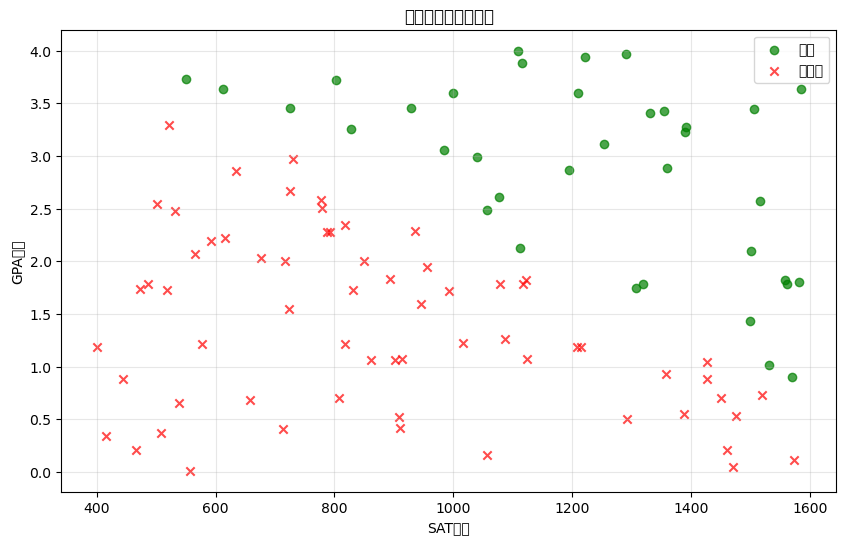

In [37]:
plt.figure(figsize=(10, 6))

# 绘制散点图：被录取的学生用绿色○，未被录取的用红色×
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

plt.scatter(admitted['SAT_Score'], admitted['GPA'], 
           c='green', marker='o', label='录取', alpha=0.7)
plt.scatter(not_admitted['SAT_Score'], not_admitted['GPA'], 
           c='red', marker='x', label='未录取', alpha=0.7)

plt.xlabel('SAT分数')
plt.ylabel('GPA成绩')
plt.title('学生成绩与录取情况')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [38]:
# 单元格3：准备机器学习数据
# 特征：SAT分数和GPA成绩
X = df[['SAT_Score', 'GPA']].values

# 目标：是否录取（0=未录取，1=录取）
y = df['Admitted'].values

print("特征数据形状:", X.shape)
print("目标数据形状:", y.shape)
print("\n前5个样本:")
for i in range(5):
    print(f"学生{i+1}: SAT={X[i][0]}, GPA={X[i][1]:.2f} -> {'录取' if y[i] == 1 else '未录取'}")


特征数据形状: (100, 2)
目标数据形状: (100,)

前5个样本:
学生1: SAT=1319.0, GPA=1.78 -> 录取
学生2: SAT=818.0, GPA=1.21 -> 未录取
学生3: SAT=1194.0, GPA=2.87 -> 录取
学生4: SAT=1499.0, GPA=1.43 -> 录取
学生5: SAT=1124.0, GPA=1.07 -> 未录取


In [39]:
model = LogisticRegression()
model.fit(X, y)

print("模型训练完成！")
print(f"模型系数: {model.coef_}")  # SAT和GPA的权重
print(f"模型截距: {model.intercept_}")

模型训练完成！
模型系数: [[0.00960508 3.3880712 ]]
模型截距: [-17.82947113]


In [40]:
# 单元格5：预测新学生的录取情况
# 新学生1：成绩一般
new_student1 = [[1200, 3.2]]
# 新学生2：成绩优秀  
new_student2 = [[1450, 3.8]]
# 新学生3：成绩很差
new_student3 = [[950, 2.5]]

students = [new_student1, new_student2, new_student3]

print("=== 录取预测结果 ===")
for i, student in enumerate(students):
    prediction = model.predict(student)[0]
    probability = model.predict_proba(student)[0]
    
    print(f"\n学生{i+1}: SAT={student[0][0]}, GPA={student[0][1]}")
    print(f"  预测结果: {'录取' if prediction == 1 else '未录取'}")
    print(f"  录取概率: {probability[1]*100:.1f}%")
    print(f"  未录取概率: {probability[0]*100:.1f}%")


=== 录取预测结果 ===

学生1: SAT=1200, GPA=3.2
  预测结果: 录取
  录取概率: 98.9%
  未录取概率: 1.1%

学生2: SAT=1450, GPA=3.8
  预测结果: 录取
  录取概率: 100.0%
  未录取概率: 0.0%

学生3: SAT=950, GPA=2.5
  预测结果: 未录取
  录取概率: 44.2%
  未录取概率: 55.8%


d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32489 (\N{CJK UNIFIED IDEOGRAPH-7EE9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Li

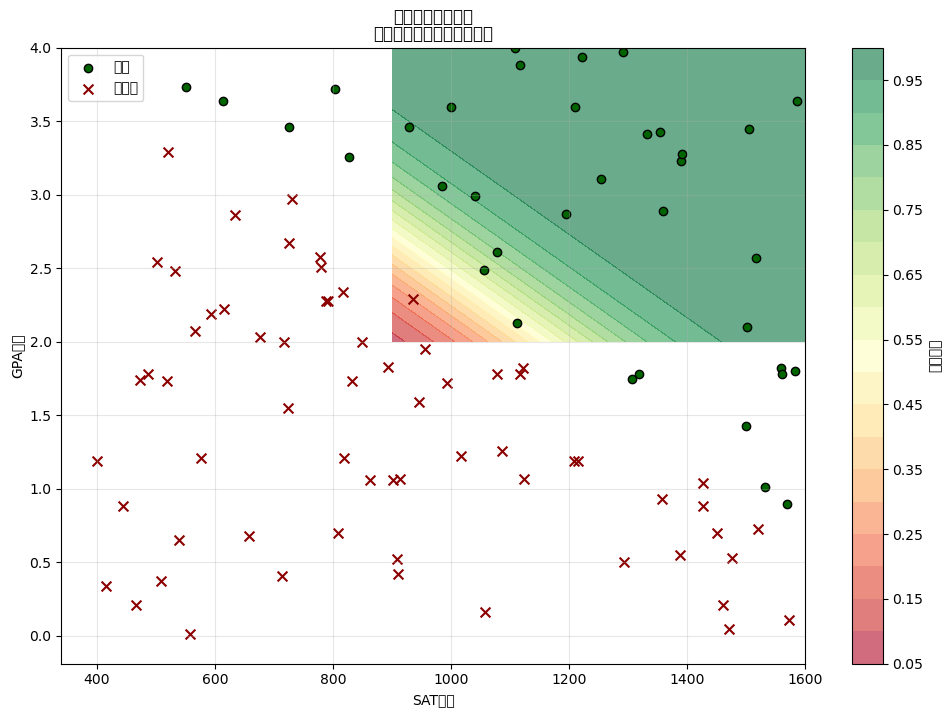

In [41]:
# 单元格6：看看模型的决策边界（可选，但很直观）
# 创建网格点
sat_range = np.linspace(900, 1600, 100)
gpa_range = np.linspace(2.0, 4.0, 100)
SAT, GPA = np.meshgrid(sat_range, gpa_range)

# 预测每个点的概率
grid_points = np.c_[SAT.ravel(), GPA.ravel()]
probs = model.predict_proba(grid_points)[:, 1].reshape(SAT.shape)

# 绘制决策边界
plt.figure(figsize=(12, 8))
plt.contourf(SAT, GPA, probs, levels=20, cmap='RdYlGn', alpha=0.6)
plt.colorbar(label='录取概率')

# 绘制原始数据点
plt.scatter(admitted['SAT_Score'], admitted['GPA'], 
           c='darkgreen', marker='o', label='录取', edgecolors='black')
plt.scatter(not_admitted['SAT_Score'], not_admitted['GPA'], 
           c='darkred', marker='x', label='未录取', s=50)

plt.xlabel('SAT分数')
plt.ylabel('GPA成绩')
plt.title('大学录取预测模型\n颜色越绿表示录取概率越高')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


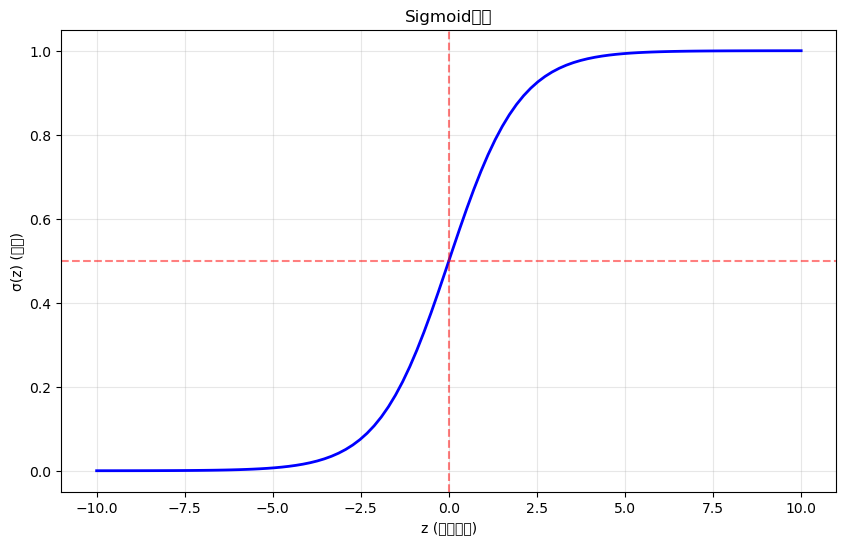

In [42]:
# %%
# 可视化Sigmoid函数
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 生成数据
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # 决策边界
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)   # 中心线
plt.xlabel('z (线性组合)')
plt.ylabel('σ(z) (概率)')
plt.title('Sigmoid函数')
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
# %%
# 看看模型内部的Sigmoid计算
# 重新训练一个简单模型
X_simple = np.array([[1, 45], [2, 55], [3, 65], [4, 75], [5, 85]])
y_simple = np.array([0, 0, 1, 1, 1])

model_simple = LogisticRegression()
model_simple.fit(X_simple, y_simple)

print("模型系数:", model_simple.coef_)
print("模型截距:", model_simple.intercept_)

# 手动计算一个样本的预测
test_sample = np.array([[3.5, 68]])
linear_output = np.dot(test_sample, model_simple.coef_.T) + model_simple.intercept_
probability_manual = sigmoid(linear_output)

print(f"\n手动计算:")
print(f"线性输出 z = {linear_output[0][0]:.3f}")
print(f"Sigmoid输出 σ(z) = {probability_manual[0][0]:.3f}")

# 对比模型预测
probability_model = model_simple.predict_proba(test_sample)
print(f"模型预测概率: {probability_model[0][1]:.3f}")
print(f"两者是否一致: {np.isclose(probability_manual[0][0], probability_model[0][1])}")

模型系数: [[0.0561225 0.5612063]]
模型截距: [-33.81269064]

手动计算:
线性输出 z = 4.546
Sigmoid输出 σ(z) = 0.989
模型预测概率: 0.989
两者是否一致: True
